In [ ]:
from dotenv import load_dotenv 
import os 
from langchain_groq import ChatGroq
load_dotenv()
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")

model = ChatGroq(model="llama-3.3-70b-versatile")
# result = model.invoke("Genrate a joke on cats")
# result

AIMessage(content='Why did the cat join a band?\n\nBecause it wanted to be a purr-cussionist!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 41, 'total_tokens': 62, 'completion_time': 0.051123191, 'prompt_time': 0.002175733, 'queue_time': 0.015528084000000001, 'total_time': 0.053298924}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--842a6350-fcf3-46dd-a50b-def984fe8b2b-0', usage_metadata={'input_tokens': 41, 'output_tokens': 21, 'total_tokens': 62})

In [54]:
os.environ['HUGGINGFACE_API_KEY'] = os.getenv("HUGGINGFACE_API_KEY")
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name = "all-MiniLM-L6-v2")

In [55]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter
# from langchain_groq import 

In [56]:
urls=[
    "https://python.langchain.com/docs/introduction/",
    "https://python.langchain.com/api_reference/core/runnables/langchain_core.runnables.base.Runnable.html",
    "https://python.langchain.com/api_reference/core/agents.html"
]

In [57]:
docs = [WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://python.langchain.com/docs/introduction/', 'title': 'Introduction | 🦜️🔗 LangChain', 'description': 'LangChain is a framework for developing applications powered by large language models (LLMs).', 'language': 'en'}, page_content='\n\n\n\n\nIntroduction | 🦜️🔗 LangChain\n\n\n\n\n\n\n\n\nSkip to main contentOur Building Ambient Agents with LangGraph course is now available on LangChain Academy!IntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQL dataSummarize TextHow-to guidesHo

In [58]:
docs_list = [item for sublist in docs for item in sublist]


In [59]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 1000 , chunk_overlap = 100)
docs_splits = text_splitter.split_documents(docs_list)
vectorstore=FAISS.from_documents(
    documents=docs_splits,
    embedding=embeddings
)

s:\AI_AGENTS\Python_N_Env\LangGraph\graphenv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [60]:
retriever_langchain= vectorstore.as_retriever()

In [61]:
from langchain.tools.retriever import create_retriever_tool
retriever_tool_langchain= create_retriever_tool(
    retriever_langchain,
    "retriever_vector_langchain_blog",
    "Search and run information about Langchain"
)

In [62]:
urls_langgraph = [
    'https://www.langchain.com/langgraph',
    'https://python.langchain.com/docs/tutorials/agents/',
    'https://python.langchain.com/docs/versions/migrating_memory/'
]

In [63]:
docs = [WebBaseLoader(url).load() for url in urls_langgraph]
docs

[[Document(metadata={'source': 'https://www.langchain.com/langgraph', 'title': 'LangGraph', 'description': 'Build controllable agents with LangGraph, our low-level agent orchestration framework. Deploy and scale with LangGraph Platform, with APIs for state management, a visual studio for debugging, and multiple deployment options.', 'language': 'en'}, page_content='LangGraph\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nProducts\n\nFrameworksLangGraphLangChainPlatformsLangSmithLangGraph PlatformResources\n\nResources HubBlogCustomer StoriesLangChain AcademyCommunityExpertsChangelogDocs\n\nPythonLangGraphLangSmithLangChainJavaScriptLangGraphLangSmithLangChainCompany\n\nAboutCareersPricingGet a demoSign upBalance agent control with agencyGain control with LangGraph to design agents that reliably handle complex tasks.Start building\n\nIntroduction to LangGraphLearn the basics of LangGraph in this LangChain Academy Course. You\'ll learn how to build agents that automate real-world tasks with LangGr

In [64]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstorelanggraph=FAISS.from_documents(
    documents=doc_splits,
    embedding=embeddings
)


retriever_langGraph=vectorstorelanggraph.as_retriever()

In [65]:
from langchain.tools.retriever import create_retriever_tool

retriever_tool_langgraph=create_retriever_tool(
    retriever_langGraph,
    "retriever_vector_langGraph_blog",
    "Search and run information about LangGraph"
)

In [66]:
tools=[retriever_tool_langgraph,retriever_tool_langchain]

In [67]:
from langgraph.graph.message import add_messages

In [68]:
from typing import Annotated, Sequence , Literal
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage , HumanMessage

# from langgraph.graph.message import add_messag
# es
from langgraph.graph.message import add_messages
from pydantic import BaseModel , Field

class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [69]:
model = ChatGroq(model="llama-3.3-70b-versatile")
model.invoke('hello')

AIMessage(content='Hello. How can I help you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.018348265, 'prompt_time': 0.001731399, 'queue_time': 0.008412098, 'total_time': 0.020079664}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9a8b91ba77', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--8164ab98-99e8-431d-8177-e6024391aa23-0', usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46})

# **`Nodes Definition`**

In [70]:
def agent(state):
    """
    Invokes the agent model to generate the response based on the current state.Given question it will
    decide whether to do a tool call or just end the response
    Args:
        state (messages) : Current state
    Returns:
        dict : updated state with agent response appended to the messages    
    """
    print("__________________ CALL AGENT ___________________")
    model = ChatGroq(model="llama-3.3-70b-versatile")
    llm_with_tool = model.bind_tools(tools)
    msg = state['messages']
    response = llm_with_tool.invoke(msg)
    return {"messages" : [response]}



In [71]:
from langchain_core.prompts import PromptTemplate
def gradeDocument(state) -> Literal['generate' , 'rewrite']:
    """
    Determine whether the retrieved document is relevant to the question of user or not
    Args: 
        state (messages) : current state
    Returns : 
        str : A decision for whether the documents are relevant or not
    """
    print("---CHECK RELEVANCE---")

    class Grade(BaseModel):
        """ Binary score for the Relevance of the document"""
        binaryscore : str = Field(description="Relevance score 'Yes' or 'No'")


    model = ChatGroq(model="llama-3.3-70b-versatile")
    model_str_par = model.with_structured_output(Grade)

    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )
    msg = state['messages']
    question = msg[0].content
    last_msg = msg[-1].content
    chain = prompt | model_str_par
    bin_res = chain.invoke({"context" : last_msg , "question" : question})
    score = bin_res.binaryscore
    if (score == "Yes" or score == 'yes'):
        print("---DECISION: DOCS RELEVANT---")
        return "generate"
    elif (score =='No' or score == 'no'):
        print("---DECISION: DOCS NOT RELEVANT---")
        return "rewrite"


In [72]:
from langchain_core.output_parsers import StrOutputParser
from langchain import hub
def generate(state):
    """
    Generaet Answer
    Args:
        state (messages) : The current state
    Returns :
        dict : updated message
    
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    # Prompt
    prompt = hub.pull("rlm/rag-prompt")

    # LLM
    llm = ChatGroq(model="llama-3.3-70b-versatile")


    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [73]:
from langchain_core.messages import HumanMessage
from langchain_groq import ChatGroq

def rewrite(state):
    """
    Transform the query to produce the relevant document from the tool
    
    Args:
        state (dict): The current state

    Returns:
        dict: The updated state with re-phrased question
    """
    print("---TRANSFORM QUERY---")
    messages = state["messages"]

    # Get the original question from the user's message
    question = messages[0].content

    # Now create the prompt using the question
    msg = [HumanMessage(content=f"""
        Look at the input and try to reason about the underlying meaning and semantics.

        Here is the Initial Question:
        -------
        {question}
        -------

        Formulate the Improved Question.
    """)]

    model = ChatGroq(model="llama-3.3-70b-versatile")
    response = model.invoke(msg)

    return {"messages": [response]}  # or: {"messages": messages + [response]} if you want to preserve history


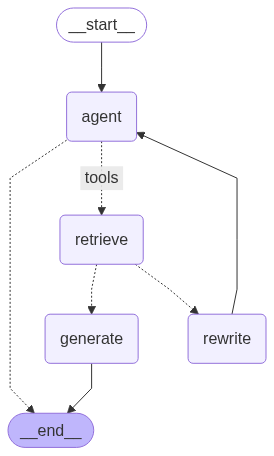

In [74]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
builder = StateGraph(AgentState)

builder.add_node('agent' , agent)
builder.add_node('retrieve' , ToolNode(tools))
builder.add_node('generate' , generate)
builder.add_node('rewrite' , rewrite)

builder.add_edge(START , 'agent')
builder.add_conditional_edges('agent' , tools_condition,
                              {
                                  'tools' : 'retrieve', ## if there is need about tool call then it will do it o/w just LLM give the answer and that's it
                                  END : END
                              })

builder.add_conditional_edges('retrieve' , gradeDocument)
builder.add_edge('generate' , END)
builder.add_edge('rewrite' , "agent")
graph = builder.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))



In [75]:
graph.invoke({"messages":"What is Computer Vision?"})

__________________ CALL AGENT ___________________


s:\AI_AGENTS\Python_N_Env\LangGraph\graphenv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


---CHECK RELEVANCE---
---DECISION: DOCS NOT RELEVANT---
---TRANSFORM QUERY---
__________________ CALL AGENT ___________________


s:\AI_AGENTS\Python_N_Env\LangGraph\graphenv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


---CHECK RELEVANCE---
---DECISION: DOCS NOT RELEVANT---
---TRANSFORM QUERY---
__________________ CALL AGENT ___________________


s:\AI_AGENTS\Python_N_Env\LangGraph\graphenv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


---CHECK RELEVANCE---
---DECISION: DOCS NOT RELEVANT---
---TRANSFORM QUERY---
__________________ CALL AGENT ___________________


{'messages': [HumanMessage(content='What is Computer Vision?', additional_kwargs={}, response_metadata={}, id='a68c16c9-6b07-4680-8076-88b53167bfb3'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '8e1keryx9', 'function': {'arguments': '{"query":"What is Computer Vision?"}', 'name': 'retriever_vector_langchain_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 312, 'total_tokens': 334, 'completion_time': 0.075352286, 'prompt_time': 0.015965686, 'queue_time': 0.009121942000000001, 'total_time': 0.091317972}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--de625bd1-cddd-4948-970e-ef72642bd17e-0', tool_calls=[{'name': 'retriever_vector_langchain_blog', 'args': {'query': 'What is Computer Vision?'}, 'id': '8e1keryx9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 312, 'output_tokens': 22,

In [76]:
graph.invoke({"messages":"What is Machine learning?"})

__________________ CALL AGENT ___________________


s:\AI_AGENTS\Python_N_Env\LangGraph\graphenv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


---CHECK RELEVANCE---
---DECISION: DOCS NOT RELEVANT---
---TRANSFORM QUERY---
__________________ CALL AGENT ___________________


{'messages': [HumanMessage(content='What is Machine learning?', additional_kwargs={}, response_metadata={}, id='442700cf-07b2-449c-9a76-a2b0e8e18b2f'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '6hnmx7f3y', 'function': {'arguments': '{"query":"Machine learning definition"}', 'name': 'retriever_vector_langGraph_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 312, 'total_tokens': 333, 'completion_time': 0.062221044, 'prompt_time': 0.023627134, 'queue_time': 0.008770452999999998, 'total_time': 0.085848178}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--2589dde5-ee8a-4c56-84f6-9bf3165956f6-0', tool_calls=[{'name': 'retriever_vector_langGraph_blog', 'args': {'query': 'Machine learning definition'}, 'id': '6hnmx7f3y', 'type': 'tool_call'}], usage_metadata={'input_tokens': 312, 'output_token